# Data preprocessing 資料前處理

In [43]:
import pandas as pd
import numpy as np

# From LiterallyWikidata read data and check data

In [44]:
column_name = ["e","a","v"]
df48_ori = pd.read_csv("/projekte/tcl/tclext/kgc_chu/LiterallyWikidata/LitWD48K/numeric_literals.txt",sep="\t",names=column_name)

In [3]:
df48_ori[215:225]

,e,a,v
215,Q100137,P2044_Q11573,+454^^<http://www.w3.org/2001/XMLSchema#decimal>
216,Q100137,P2046_Q25343,+4680000.00^^<http://www.w3.org/2001/XMLSchema...
217,Q1001416,P1082_Q199,+2633^^<http://www.w3.org/2001/XMLSchema#decimal>
218,Q1001416,P2044_Q11573,+319^^<http://www.w3.org/2001/XMLSchema#decimal>
219,Q1001416,P2046_Q25343,+6920000^^<http://www.w3.org/2001/XMLSchema#de...
220,Q100141,P1082_Q199,+8173^^<http://www.w3.org/2001/XMLSchema#decimal>
221,Q100141,P2044_Q11573,+188^^<http://www.w3.org/2001/XMLSchema#decimal>
222,Q100141,P2046_Q25343,+5780000.00^^<http://www.w3.org/2001/XMLSchema...
223,Q100141,P2046_Q25343,+5830000.00^^<http://www.w3.org/2001/XMLSchema...
224,Q100143,P1082_Q199,+3067^^<http://www.w3.org/2001/XMLSchema#decimal>


In [45]:
df48 = df48_ori

In [46]:
#取V值
df48[['v','xml']] = df48['v'].str.split('^', 1, expand=True)

In [6]:
# check the number of data
print(f'triple number of df48: {len(df48)}, num of df48_entity: {len(df48["e"].unique())}, num of df48_attribute: {len(df48["a"].unique())}')

triple number of df48: 324418, num of df48_entity: 47998, num of df48_attribute: 291


In [7]:
df48.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324418 entries, 0 to 324417
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   e       324418 non-null  object
 1   a       324418 non-null  object
 2   v       324418 non-null  object
 3   xml     324418 non-null  object
dtypes: object(4)
memory usage: 9.9+ MB


# Discovering some issues within data

## 3 value types

In [31]:
#有三種數值型態
df48['xml'].value_counts()

^<http://www.w3.org/2001/XMLSchema#decimal>     148707
^<http://www.w3.org/2001/XMLSchema#double>      118078
^<http://www.w3.org/2001/XMLSchema#dateTime>     57633
Name: xml, dtype: int64

## Time (year-month-date)

In [56]:
# value type: time
time = df48[df48['xml']=='^<http://www.w3.org/2001/XMLSchema#dateTime>']

In [9]:
df48[df48['']=='Q762']
#(Leonardo da Vinci, date of birth, 1452-04-24T00:00:00Z)

,e,a,v,xml,name_e,name_a
197957,Q762,P1317,1950-01-01T00:00:00Z,^<http://www.w3.org/2001/XMLSchema#dateTime>,Leonardo da Vinci,floruit
197958,Q762,P2032,1519-01-01T00:00:00Z,^<http://www.w3.org/2001/XMLSchema#dateTime>,Leonardo da Vinci,work period (end)
197959,Q762,P569,1452-04-24T00:00:00Z,^<http://www.w3.org/2001/XMLSchema#dateTime>,Leonardo da Vinci,date of birth
197960,Q762,P570,1519-05-12T00:00:00Z,^<http://www.w3.org/2001/XMLSchema#dateTime>,Leonardo da Vinci,date of death


## Double: coordinate location

In [38]:
attri_idmap['P1110']

'attendance'

In [52]:
co=df48[df48['xml']=='^<http://www.w3.org/2001/XMLSchema#double>']

In [54]:
len(co.a.unique())
co.a.unique()

array(['P625_Latitude', 'P1332_Latitude', 'P1333_Latitude',
       'P1334_Latitude', 'P1335_Latitude', 'P5140_Latitude',
       'P2786_Latitude', 'P625_Longtiude', 'P1332_Longtiude',
       'P1333_Longtiude', 'P1334_Longtiude', 'P1335_Longtiude',
       'P5140_Longtiude', 'P2786_Longtiude'], dtype=object)

In [47]:
# value type: double (geographic)
# coordinate location in original data is mixed. P625，P1335...(coordinate location)有經緯度
#df48[df48["a"].str.contains("P2032")][30:50]
df48[df48["e"]=="Q41421"][:30]
#(2010 FIFA World Cup, attendance, 3178856)
#(Stuttgart, coordinate location(logtitude), 9.1775)
#(Stuttgart, coordinate location(latitude), 48.776111111111)
#(Stuttgart, population, 634830)
#(Michael Jordan, work period (end), 2003-01-01T00:00:00Z)

,e,a,v,xml,name_e,name_a
69982,Q41421,P2048_Q11573,+1.9812,^<http://www.w3.org/2001/XMLSchema#decimal>,Michael Jordan,NaN
69983,Q41421,P2067_Q11570,+88.45051215,^<http://www.w3.org/2001/XMLSchema#decimal>,Michael Jordan,NaN
69984,Q41421,P2067_Q11570,+89.81128926,^<http://www.w3.org/2001/XMLSchema#decimal>,Michael Jordan,NaN
69985,Q41421,P2067_Q11570,+97.97595192,^<http://www.w3.org/2001/XMLSchema#decimal>,Michael Jordan,NaN
69986,Q41421,P2067_Q11570,+98,^<http://www.w3.org/2001/XMLSchema#decimal>,Michael Jordan,NaN
177466,Q41421,P2031,1984-01-01T00:00:00Z,^<http://www.w3.org/2001/XMLSchema#dateTime>,Michael Jordan,work period (start)
177467,Q41421,P2032,2003-01-01T00:00:00Z,^<http://www.w3.org/2001/XMLSchema#dateTime>,Michael Jordan,work period (end)
177468,Q41421,P569,1963-02-17T00:00:00Z,^<http://www.w3.org/2001/XMLSchema#dateTime>,Michael Jordan,date of birth


## Decimal

In [55]:
quan = df48[df48['xml']=='^<http://www.w3.org/2001/XMLSchema#decimal>']

In [56]:
len(quan.a.unique())

246

In [23]:
# value type: decimal
# same entity has multiple values 可能同entity在P1087有多個值
p1082 = df48[df48["a"].str.contains("P1082")]

In [35]:
# P2299 has 2 units 有兩種QXXX
df48[df48["a"].str.contains("P2299")].a.unique()

array(['P2299_Q550207', 'P2299_Q4917'], dtype=object)

In [36]:
# some are meanful zero value but some are not
df_vzero=df48[df48["v"]=='0'].sort_values(by='a')

In [37]:
df_vzero[:5]

,e,a,v,xml
103937,Q574,P1279_Q199,0,^<http://www.w3.org/2001/XMLSchema#decimal>
58871,Q334,P1279_Q199,0,^<http://www.w3.org/2001/XMLSchema#decimal>
41606,Q229,P1279_Q199,0,^<http://www.w3.org/2001/XMLSchema#decimal>
305557,Q51,P1333_Longtiude,0,^<http://www.w3.org/2001/XMLSchema#double>
128034,Q778,P2219_Q199,0,^<http://www.w3.org/2001/XMLSchema#decimal>


In [38]:
print(f"there are total {len(df_vzero)} data which has 0.0 in the value column")
print(f"there are total {len(df_vzero['a'].unique())} data which has 0.0 in the value column")

there are total 163 data which has 0.0 in the value column
there are total 8 data which has 0.0 in the value column


In [39]:
df48[df48["a"].str.contains("P1082")].v

0            +11032
3             +1375
6             +4109
9             +6009
12             +119
            ...    
148685         +706
148688         +712
148691        +8551
148694        +7868
148697    +39144818
Name: v, Length: 22299, dtype: object

# Dealing with issues 處理以上問題: 
DataTime dtype: keep year data 時間單位 西元年 \\
Remove dulplicated data (same e,a but diff v)
Turn into value dtype to float 
所有變數的值成為可計算的值(有意義可讀取的值) \\
Rescale the values within the same attributes 同attribute value rescale \\
Drop out unreasonal 0 value 去0 \\
Drop out the unit (QXXX)去單位 \\
Keep Attribyes at least number of 15 data 每個屬性最少有15筆資料 \\


## value type: time

In [47]:
# 如果"v"是時間，取前四位數年代部分，np.where(condition, x,y)在condition下，把x取代y
df48["new_v"] = df48["v"].map(lambda x: x[:4])
df48.loc[:,"v"] = np.where((df48["xml"].str.contains("dateTime")), df48["new_v"], df48["v"])

In [48]:
df48["v"]=df48["v"].astype('float32')

## value type: double

In [42]:
# remove double data
#neogeo = df48[~df48['xml'].str.contains('double')]

## value type: decimal

In [50]:
#取有150data的att #同時解決同p不同q
filter = df48.a.value_counts()
filter_index=filter.index[filter>=150]
df48 = df48[df48['a'].isin(filter_index)]

In [51]:
df48.a.value_counts()

P625_Longtiude    24952
P625_Latitude     24952
P2046_Q25343      24039
P1082_Q199        22299
P2044_Q11573      16734
                  ...  
P2219_Q199          164
P2131_Q4917         163
P4010_Q550207       156
P2299_Q550207       155
P1279_Q199          152
Name: a, Length: 93, dtype: int64

In [49]:
#處理a，去單位
df48[["pre_a",'Q']] = df48["a"].str.split('_', 1,expand=True)
df48.loc[:,"new_a"] = np.where((df48["a"].str.contains("Q")), df48["pre_a"], df48["a"])

In [61]:
#處理重複值 drop if [e,a] is the same
df48_dedup = df48.groupby(['e', 'a'], group_keys=False).apply(lambda x: x.sample(1))

In [47]:
#處理重複值 drop if [e,a] is the same
df48 = df48.drop_duplicates(subset=['e','a'],keep='last')

In [48]:
#如果要取平均值:處理重複資料
# df48 = df48.groupby(['e', 'a'], as_index=False).mean()

In [62]:
df48_dedup

,e,a,v,xml,new_v,pre_a,Q,new_a
729,Q100,P1082_Q199,6.175940e+05,^<http://www.w3.org/2001/XMLSchema#decimal>,+617,P1082,Q199,P1082
730,Q100,P2044_Q11573,4.300000e+01,^<http://www.w3.org/2001/XMLSchema#decimal>,+43,P2044,Q11573,P2044
731,Q100,P2046_Q25343,2.321406e+08,^<http://www.w3.org/2001/XMLSchema#decimal>,+232,P2046,Q25343,P2046
148752,Q100,P571,1.630000e+03,^<http://www.w3.org/2001/XMLSchema#dateTime>,1630,P571,None,P571
207090,Q100,P625_Latitude,4.235833e+01,^<http://www.w3.org/2001/XMLSchema#double>,42.3,P625,Latitude,P625_Latitude
...,...,...,...,...,...,...,...,...
324414,Q99987,P1335_Longtiude,9.564391e+00,^<http://www.w3.org/2001/XMLSchema#double>,9.56,P1335,Longtiude,P1335_Longtiude
148695,Q99987,P2044_Q11573,2.670000e+02,^<http://www.w3.org/2001/XMLSchema#decimal>,+267,P2044,Q11573,P2044
148696,Q99987,P2046_Q25343,4.140000e+06,^<http://www.w3.org/2001/XMLSchema#decimal>,+414,P2046,Q25343,P2046
265376,Q99987,P625_Latitude,4.571767e+01,^<http://www.w3.org/2001/XMLSchema#double>,45.7,P625,Latitude,P625_Latitude


In [63]:
df48 = df48_dedup.loc[:,['e','new_a','v']]
df48.columns=['e','a','v']


In [66]:
df48.a.value_counts()

P625_Latitude     24952
P625_Longtiude    24952
P2046             21751
P1082             21446
P2044             16418
                  ...  
P2299               155
P2234               154
P3872               154
P1279               152
P2219               151
Name: a, Length: 87, dtype: int64

In [65]:
filter = df48.a.value_counts()
filter_index=filter.index[filter>=150]
df48 = df48[df48['a'].isin(filter_index)]

In [67]:
df48

,e,a,v
729,Q100,P1082,6.175940e+05
730,Q100,P2044,4.300000e+01
731,Q100,P2046,2.321406e+08
148752,Q100,P571,1.630000e+03
207090,Q100,P625_Latitude,4.235833e+01
...,...,...,...
324414,Q99987,P1335_Longtiude,9.564391e+00
148695,Q99987,P2044,2.670000e+02
148696,Q99987,P2046,4.140000e+06
265376,Q99987,P625_Latitude,4.571767e+01


In [75]:
#處理0值
df48[df48['v']==0.0]

,e,a,v,name_e,name_a
1551,Q1019532,P2927,0.0,Markleeville,water as percent of area
1768,Q1024085,P2927,0.0,El Sobrante,water as percent of area
2007,Q10268484,P6509,0.0,Douglas dos Santos,total goals in career
2052,Q1027483,P6509,0.0,Luiz Diallisson de Souza Alves,total goals in career
2178,Q1028196,P2927,0.0,Cambria,water as percent of area
...,...,...,...,...,...
148354,Q995178,P6509,0.0,Bryce Lampman,total goals in career
148356,Q995178,P6544,0.0,Bryce Lampman,total points in career
148357,Q995178,P6545,0.0,Bryce Lampman,total assists in career
148380,Q9954,P2044,0.0,Purmerend,elevation above sea level


## zero value

In [74]:
# preparing idmap for checking real name
entity_idmap = {}
with open('Entities/entity_labels_en.txt',encoding="utf-8") as f:
    for line in f:
        k, v = line.strip().split('\t')
        entity_idmap[k.strip()] = v.strip()
attri_idmap={}
with open('Attributes/attribute_labels_en.txt',encoding="utf-8") as f:
    for line in f:
        k, v = line.strip().split('\t')
        attri_idmap[k.strip()] = v.strip()
attri_idmap['P625_Latitude']='coordinate location(latitude)'
attri_idmap['P625_Longtiude']='coordinate location(logtitude)'
attri_idmap['P1332_Longtiude']='coordinates of northernmost point'
attri_idmap['P1332_Latitude']='coordinates of northernmost point'
attri_idmap['P1333_Longtiude']='coordinates of southernmost point'
attri_idmap['P1333_Latitude']='coordinates of southernmost point'
attri_idmap['P1334_Longtiude']='coordinates of easternmost point'
attri_idmap['P1334_Latitude']='coordinates of easternmost point'
attri_idmap['P1335_Longtiude']='coordinates of westernmost point'
attri_idmap['P1335_Latitude']='coordinates of westernmost point'
attri_idmap['P5140_Longtiude']='coordinates of geographic center(logtitude)'
attri_idmap['P5140_Latitude']='coordinates of geographic center(latitude)'


df48.loc[:,'name_e']=df48['e'].map(entity_idmap)
df48.loc[:,'name_a']=df48['a'].map(attri_idmap)

In [80]:
df48 = df48.reset_index(drop=True)

In [81]:
df48.to_csv('LitWD48K/num_lit_newest.csv',index=False)

In [ ]:
# 刪掉特定列，有11個不合理的0值變數
df48 = df48.drop(df48[(df48['a']=='P6509') & (df48['v']==0.0)].index)#'total goals in career'
df48 = df48.drop(df48[(df48['a']=='P6544') & (df48['v']==0.0)].index)#total points in career 
df48 = df48.drop(df48[(df48['a']=='P6543') & (df48['v']==0.0)].index)#total shots in career
df48 = df48.drop(df48[(df48['a']=='P6546') & (df48['v']==0.0)].index)#penalty minutes in career
df48 = df48.drop(df48[(df48['a']=='P6545') & (df48['v']==0.0)].index)#total assists in career 
df48 = df48.drop(df48[(df48['a']=='P1100') & (df48['v']==0.0)].index)#attendance 
df48 = df48.drop(df48[(df48['a']=='P1279') & (df48['v']==0.0)].index)##inflation rate
df48 = df48.drop(df48[(df48['a']=='P2121') & (df48['v']==0.0)].index)#prize money
df48 = df48.drop(df48[(df48['a']=='P3872') & (df48['v']==0.0)].index)#惠顧人數patronage

In [ ]:
df48.reset_index(inplace=True)


In [ ]:
df48= df48.drop('index',axis=1)
df48.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296457 entries, 0 to 296456
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   e       296457 non-null  object 
 1   a       296457 non-null  object 
 2   v       296457 non-null  float32
 3   name_e  296457 non-null  object 
 4   name_a  262436 non-null  object 
dtypes: float32(1), object(4)
memory usage: 10.2+ MB


In [ ]:
# 縮小domain

In [ ]:
filter = df48.a.value_counts()
filter_index=filter.index[filter>=150]
df48 = df48[df48['a'].isin(filter_index)]

In [ ]:
print(f'triple number of df48: {len(df48)}, num of df48_entity: {len(df48["e"].unique())}, num of df48_attribute: {len(df48["a"].unique())}')

triple number of df48: 296308, num of df48_entity: 47939, num of df48_attribute: 86


In [ ]:
ent_typemap = {}
with open('Entities/entity_types.txt',encoding="utf-8") as f:
    for line in f:
        k, v = line.strip().split('\t')
        ent_typemap[k.strip()] = v.strip()

In [ ]:
df48['ent_type'] = df48['e'].map(ent_typemap)

In [ ]:
df48 = df48.loc[:,["e","a","v","name_e","name_a","ent_type"]]

In [ ]:
print(f'triple number of df48: {len(df48)}, num of df48_entity: {len(df48["e"].unique())}, num of df48_attribute: {len(df48["a"].unique())}')

triple number of df48: 296308, num of df48_entity: 47939, num of df48_attribute: 86


In [ ]:
df48.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296308 entries, 0 to 296456
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   e         296308 non-null  object 
 1   a         296308 non-null  object 
 2   v         296308 non-null  float32
 3   name_e    296308 non-null  object 
 4   name_a    262287 non-null  object 
 5   ent_type  296308 non-null  object 
dtypes: float32(1), object(5)
memory usage: 14.7+ MB


In [ ]:
df48['name_a']=df48['name_a'].astype('string')

In [ ]:
df48_p=df48

In [ ]:
row_idx = []
def gather_data(name_att,df):
    df = df.reset_index(drop=True)
    ents = list(df[df['name_a'].str.contains(name_att,na=False)].e.unique())
    for ent in ents:
        list_ent=list(df[df['e']==ent].index)
        row_idx.extend(list_ent)
    return row_idx

In [ ]:
ent_idx=gather_data('population',df48_p)

In [ ]:
ent_idx2=gather_data('GDP',df48_p)

In [ ]:
df48_p.iloc[ent_idx2,:]

,e,a,v,name_e,name_a,ent_type
147,Q1000,P1081,7.020000e-01,Gabon,Human Development Index,Q3624078
148,Q1000,P1082,2.025137e+06,Gabon,population,Q3624078
150,Q1000,P2046,2.676670e+08,Gabon,area,Q3624078
151,Q1000,P2131,1.462288e+10,Gabon,nominal GDP,Q3624078
152,Q1000,P2132,7.413000e+03,Gabon,nominal GDP per capita,Q3624078
...,...,...,...,...,...,...
237095,Q986,P1335_Latitude,1.511000e+01,Eritrea,NaN,Q7270
237096,Q986,P625_Latitude,1.548333e+01,Eritrea,coordinate location(latitude),Q7270
296067,Q986,P1332_Longtiude,3.857000e+01,Eritrea,coordinates of northernmost point,Q7270
296068,Q986,P1335_Longtiude,3.665750e+01,Eritrea,coordinates of westernmost point,Q7270


In [ ]:
gdp_related_att = df48.iloc[list(set(ent_idx2)),:]

In [ ]:
gdp_related_att=gdp_related_att.loc[:,['e','a','v']]

In [ ]:
gdp_related_att.to_csv('files_needed/gdp_related.txt',index=False)

# type specific

In [ ]:
row_idx = []
def gather_data(name_att,df):
    df = df.reset_index(drop=True)
    a_type = list(df[df['name_a'].str.contains(name_att)].ent_type.unique())
    for type in a_type:
        list_type=list(df[df['ent_type']==type].index)
        row_idx.extend(list_type)
    return row_idx

In [ ]:
idx= gather_data("population",df48)
pop_related_att = df48.iloc[idx,:]
pop_related_att.reset_index(inplace=True)
pop_related_att=pop_related_att.drop('index',axis=1)

In [ ]:
pop_related_att.to_csv('files_needed/pop_related_att',index=False)

In [ ]:
df48[df48.name_a.str.contains("work")]

In [ ]:
idx2= gather_data("date of birth",df48)
people_related_att = df48.iloc[idx2,:]


In [ ]:
var_name = ["population","GDP (PPP)","PPP GDP per capita",
      "date of birth","date of death", "life expectancy",
      "total revenue","net profit",
      "area",
      "retirement age","age of majority","work period (start)","work period (end)"]

In [ ]:
people_related_att.name_a.value_counts()

In [ ]:
pop_related_att = pd.read_csv('files_needed/pop_related_att')

In [ ]:
attri_data=pd.read_csv('files_needed/numeric_literals_ver06')
attri_data_ori=attri_data.iloc[:,0:6]

In [ ]:
train_attri_data[train_attri_data['a']=='P1082']

,e,a,v,name_e,name_a,ent_type,new_stdv
36563,Q25160,P1082,789.0,Olcenengo,population,Q747074,-0.029652
21353,Q17296,P1082,769.0,Camino,population,Q747074,-0.029652
33711,Q23243,P1082,756.0,"Bee, Piedmont",population,Q747074,-0.029653
88403,Q591156,P1082,85930.0,St. Croix County,population,Q12178928,-0.027119
60138,Q44835372,P1082,3289.0,Rio,population,Q747074,-0.029577
...,...,...,...,...,...,...,...
61880,Q46665,P1082,17879.0,Villorba,population,Q747074,-0.029143
71592,Q50083,P1082,280.0,Civitella Alfedena,population,Q747074,-0.029667
6023,Q113438,P1082,3570.0,Vågå,population,Q755707,-0.029569
22876,Q17780,P1082,162.0,Castelletto Molina,population,Q747074,-0.029670


In [ ]:
attri_data[attri_data['a']=='P4010']
#train_attri_data[train_attri_data['e']=='Q10000138']

,e,a,v,name_e,name_a,ent_type,std_v,minmax_v
156,Q1000,P4010,3.668191e+10,Gabon,GDP (PPP),Q3624078,-0.225985,0.001880
414,Q1005,P4010,3.569106e+09,The Gambia,GDP (PPP),Q6256,-0.241117,0.000181
461,Q1006,P4010,2.857575e+10,Guinea,GDP (PPP),Q6256,-0.229690,0.001464
519,Q1007,P4010,3.171312e+09,Guinea-Bissau,GDP (PPP),Q6256,-0.241299,0.000160
588,Q1008,P4010,9.583674e+10,Ivory Coast,GDP (PPP),Q7270,-0.198953,0.004916
...,...,...,...,...,...,...,...,...
121853,Q971,P4010,2.869352e+10,Republic of the Congo,GDP (PPP),Q6256,-0.229636,0.001470
122011,Q974,P4010,7.231902e+10,Democratic Republic of the Congo,GDP (PPP),Q6256,-0.209700,0.003709
122243,Q977,P4010,2.342711e+09,Djibouti,GDP (PPP),Q6256,-0.241678,0.000118
122774,Q983,P4010,3.098132e+10,Equatorial Guinea,GDP (PPP),Q3624078,-0.228591,0.001588


## Split into train, valid and test sets


In [ ]:
from sklearn.model_selection import train_test_split
train_attri_data, valid_attri_data = train_test_split(attri_data_ori, test_size=0.2,stratify=attri_data_ori['a'],random_state=802)
valid_attri_data, test_attri_data = train_test_split(valid_attri_data, test_size=0.5,stratify=valid_attri_data['a'],random_state=802)

In [ ]:
print(f'training triples: {len(train_attri_data)}, valid triples : {len(valid_attri_data)}, test triples : {len(test_attri_data)}')

training triples: 237046, valid triples : 29631, test triples : 29631


In [ ]:
test_attri_data.a.value_counts()/len(test_attri_data)

P625_Latitude     0.084236
P625_Longtiude    0.084236
P2046             0.073403
P1082             0.072390
P2044             0.055415
                    ...   
P4010             0.000506
P3086             0.000506
P2299             0.000506
P2219             0.000506
P2234             0.000506
Name: a, Length: 86, dtype: float64

In [40]:
train_attri_data = pd.read_csv('files_needed/train_attri_data_minmax.csv')

# 在訓練集發現資料並取得見解

In [41]:
a_group = train_attri_data.groupby('name_a')

In [42]:
# visualize training attributes
def get_group_v(a_name):
    return a_group.get_group(a_name).v
var_name=["population","GDP (PPP)","PPP GDP per capita",
      "date of birth","date of death",
      "area",
      "coordinate location(latitude)","coordinate location(logtitude)","height","work period (start)","work period (end)"]

In [8]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'amount of data')

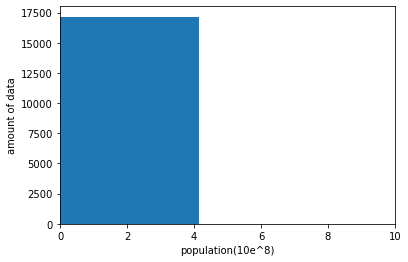

In [45]:
x_val = a_group.get_group('population').v/100000000
plt.xlim(0,10)
plt.hist(x_val)
plt.xlabel('population(10e^8)')
plt.ylabel('amount of data')

In [20]:
a_group.get_group('population')

,e,a,v,name_e,name_a,ent_type,minmax
3,Q100092,P1082,6460.0,San Cesario sul Panaro,population,Q747074,1.551299e-06
31,Q269319,P1082,681.0,Pornassio,population,Q747074,1.635348e-07
35,Q1228441,P1082,3692.0,Olèrdola,population,Q33146843,8.865938e-07
52,Q51879,P1082,5419.0,Torchiarolo,population,Q747074,1.301314e-06
58,Q2187,P1082,209083.0,Meycauayan,population,Q1549591,5.020902e-05
...,...,...,...,...,...,...,...
236995,Q995231,P1082,31340.0,Long Branch,population,Q1093829,7.525961e-06
236998,Q978152,P1082,1056.0,Montauville,population,Q484170,2.535870e-07
237006,Q102634,P1082,21141.0,Monsummano Terme,population,Q747074,5.076782e-06
237012,Q13895,P1082,590848.0,Zambales,population,Q24746,1.418857e-04


In [28]:
a_group.get_group('population')[a_group.get_group('population').v==max(a_group.get_group('population').v)]

,e,a,v,name_e,name_a,ent_type,minmax
156417,Q668,P1082,1.326093e+09,India,population,Q7270,0.318447


In [23]:
train_attri_data = train_attri_data.drop([196152])

(array([111.,   7.,   2.,   1.,   0.,   1.,   1.,   0.,   1.,   1.]),
 array([4.40212000e+07, 5.33384069e+11, 1.06672412e+12, 1.60006416e+12,
        2.13340421e+12, 2.66674426e+12, 3.20008431e+12, 3.73342436e+12,
        4.26676440e+12, 4.80010445e+12, 5.33344450e+12]),
 <BarContainer object of 10 artists>)

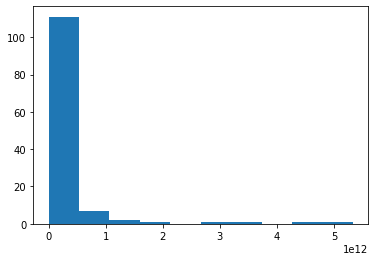

In [ ]:
plt.hist(a_group.get_group('GDP (PPP)').v)

(array([73., 21.,  8.,  8.,  8.,  1.,  1.,  1.,  2.,  1.]),
 array([   727.486 ,  13519.4134,  26311.3408,  39103.2682,  51895.1956,
         64687.123 ,  77479.0504,  90270.9778, 103062.9052, 115854.8326,
        128646.76  ]),
 <BarContainer object of 10 artists>)

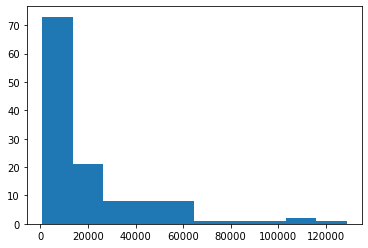

In [ ]:
plt.hist(a_group.get_group('PPP GDP per capita').v)

(array([1.1000e+01, 2.0000e+01, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        4.0000e+00, 6.0000e+00, 1.8500e+02, 4.1900e+02, 1.2099e+04]),
 array([ -10.,  191.,  392.,  593.,  794.,  995., 1196., 1397., 1598.,
        1799., 2000.]),
 <BarContainer object of 10 artists>)

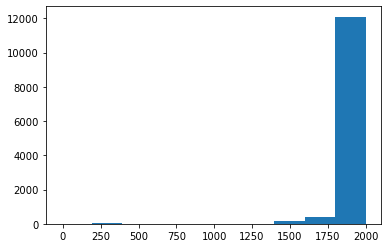

In [ ]:
plt.hist(a_group.get_group('date of birth').v)

(array([1.200e+01, 1.700e+01, 2.000e+00, 0.000e+00, 3.000e+00, 3.000e+00,
        5.000e+00, 1.150e+02, 3.740e+02, 3.508e+03]),
 array([  32. ,  231.1,  430.2,  629.3,  828.4, 1027.5, 1226.6, 1425.7,
        1624.8, 1823.9, 2023. ]),
 <BarContainer object of 10 artists>)

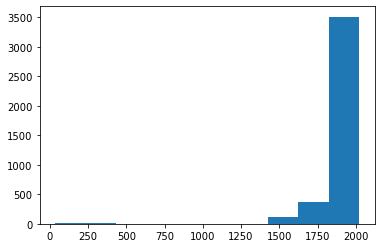

In [ ]:
plt.hist(a_group.get_group('date of death').v)

(array([3.000e+00, 3.000e+00, 1.500e+01, 6.200e+01, 5.555e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1401. , 1528.8, 1656.6, 1784.4, 1912.2, 2040. , 2167.8, 2295.6,
        2423.4, 2551.2, 2679. ]),
 <BarContainer object of 10 artists>)

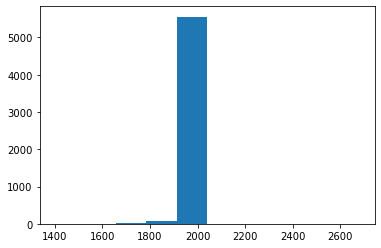

In [ ]:
plt.hist(a_group.get_group('work period (start)').v)

(array([3.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 3.000e+00, 3.890e+02, 2.242e+03]),
 array([1483. , 1536.7, 1590.4, 1644.1, 1697.8, 1751.5, 1805.2, 1858.9,
        1912.6, 1966.3, 2020. ]),
 <BarContainer object of 10 artists>)

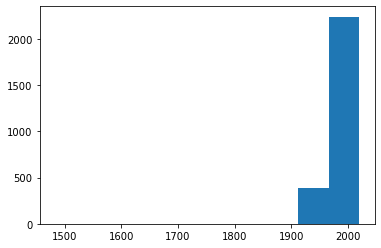

In [ ]:
plt.hist(a_group.get_group('work period (end)').v)

(array([1.74e+04, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([1.900e-01, 6.090e+17, 1.218e+18, 1.827e+18, 2.436e+18, 3.045e+18,
        3.654e+18, 4.263e+18, 4.872e+18, 5.481e+18, 6.090e+18]),
 <BarContainer object of 10 artists>)

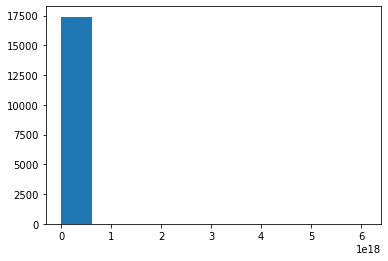

In [ ]:
plt.hist(a_group.get_group('area').v)

(array([1.0000e+00, 1.0000e+01, 1.0200e+02, 1.8700e+02, 1.9000e+02,
        4.7300e+02, 2.6100e+03, 1.5279e+04, 1.0790e+03, 3.0000e+01]),
 array([-90., -72., -54., -36., -18.,   0.,  18.,  36.,  54.,  72.,  90.]),
 <BarContainer object of 10 artists>)

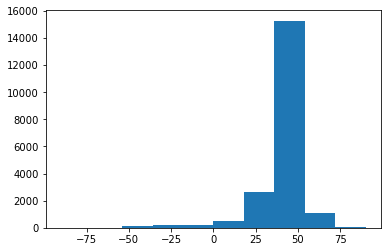

In [ ]:
plt.hist(a_group.get_group("coordinate location(latitude)").v)

(array([   67.,   805.,  2982.,   181.,  1814., 11855.,   256.,   224.,
         1587.,   190.]),
 array([-178.      , -142.232611, -106.465222,  -70.697833,  -34.930444,
           0.836945,   36.604334,   72.371723,  108.139112,  143.906501,
         179.67389 ]),
 <BarContainer object of 10 artists>)

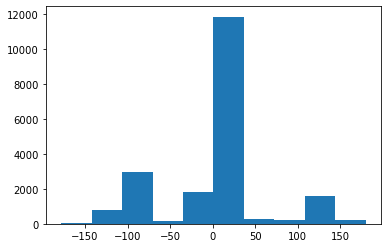

In [ ]:
plt.hist(a_group.get_group('coordinate location(logtitude)').v)

(array([6.225e+03, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([7.6000000e-02, 9.7542840e+02, 1.9507808e+03, 2.9261332e+03,
        3.9014856e+03, 4.8768380e+03, 5.8521904e+03, 6.8275428e+03,
        7.8028952e+03, 8.7782476e+03, 9.7536000e+03]),
 <BarContainer object of 10 artists>)

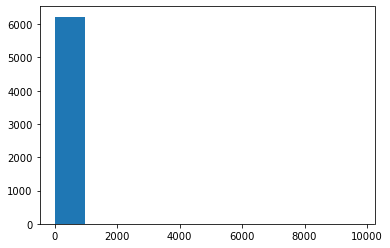

In [ ]:
plt.hist(a_group.get_group('height').v)

In [ ]:
a_group.get_group('height').v.describe()

count    6227.000000
mean        5.558281
std       126.751866
min         0.076000
25%         1.780000
50%         1.830000
75%         1.910000
max      9753.600000
Name: v, dtype: float64

In [ ]:
a_group.get_group('height')[a_group.get_group('height').v==max(a_group.get_group('height').v)]

,e,a,v,name_e,name_a,ent_type,new_stdv
10439,Q131230,P2048,9753.6,Mauna Kea,height,Q8502,76.912671


In [ ]:
a_group.get_group('height')[a_group.get_group('height').v==min(a_group.get_group('height').v)]

,e,a,v,name_e,name_a,ent_type,new_stdv
55309,Q4006202,P2048,0.076,Red Cross with Imperial Portraits,height,Q331225,-0.043256


## Rescale decimal values

In [ ]:
#標準常態係數
from sklearn.preprocessing import StandardScaler,MinMaxScaler
# method for scale value to standardscaler
def v_scale(attdf):
    scaler = StandardScaler()
    std_v = scaler.fit_transform(attdf.v.to_numpy().reshape(-1,1))
    return std_v
alist=list(train_attri_data["a"].unique())
for a_name in alist:
    attdf = train_attri_data[train_attri_data["a"]==a_name]
    attdf['new_stdv']= v_scale(attdf)
    train_attri_data.loc[attdf.index,'new_stdv']=attdf['new_stdv']

/projekte/tcl/tclext/kgc_chu/neuenv/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/projekte/tcl/tclext/kgc_chu/neuenv/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/projekte/tcl/tclext/kgc_chu/neuenv/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is tr

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
# method for scale value to minmaxscaler
def v_scale(attdf):
    scaler = MinMaxScaler()
    minmax_v = scaler.fit_transform(attdf.v.to_numpy().reshape(-1,1))
    return minmax_v
alist=list(train_attri_data["a"].unique())
for a_name in alist:
    attdf = train_attri_data[train_attri_data["a"]==a_name]
    attdf['minmax']= v_scale(attdf)
    train_attri_data.loc[attdf.index,'minmax']=attdf['minmax']

/projekte/tcl/tclext/kgc_chu/neuenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/projekte/tcl/tclext/kgc_chu/neuenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/projekte/tcl/tclext/kgc_chu/neuenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to 

In [ ]:
# method for scale value to standardscaler
# got a scaler from each attribute
def v_scale(attdf):
    scaler = MinMaxScaler()
    scaler.fit(attdf.v.to_numpy().reshape(-1,1))
    return scaler
alist=list(attri_data['a'].unique())
for a_name in alist:
    attdf = valid_attri_data[valid_attri_data["a"]==a_name]
    attdf['minmax']= v_scale(train_attri_data[train_attri_data["a"]==a_name]).transform(attdf.v.to_numpy().reshape(-1,1))
    valid_attri_data.loc[attdf.index,'minmax']=attdf['minmax']

/projekte/tcl/tclext/kgc_chu/neuenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/projekte/tcl/tclext/kgc_chu/neuenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/projekte/tcl/tclext/kgc_chu/neuenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to 

In [ ]:
def v_scale(attdf):
    scaler = MinMaxScaler(feature_range=(0, 100))
    scaler.fit(attdf.v.to_numpy().reshape(-1,1))
    return scaler
alist=list(attri_data['a'].unique())
for a_name in alist:
    attdf = test_attri_data[test_attri_data["a"]==a_name]
    attdf['minmax']= v_scale(train_attri_data[train_attri_data["a"]==a_name]).transform(attdf.v.to_numpy().reshape(-1,1))
    test_attri_data.loc[attdf.index,'minmax']=attdf['minmax']

/projekte/tcl/tclext/kgc_chu/neuenv/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/projekte/tcl/tclext/kgc_chu/neuenv/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/projekte/tcl/tclext/kgc_chu/neuenv/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [ ]:
# method for scale value to standardscaler : valid and test
# got a scaler from each attribute
def v_scale(attdf):
    scaler = StandardScaler()
    scaler.fit(attdf.v.to_numpy().reshape(-1,1))
    return scaler
alist=list(attri_data['a'].unique())
for a_name in alist:
    attdf = valid_attri_data[valid_attri_data["a"]==a_name]
    attdf['new_stdv']= v_scale(train_attri_data[train_attri_data["a"]==a_name]).transform(attdf.v.to_numpy().reshape(-1,1))
    valid_attri_data.loc[attdf.index,'new_stdv']=attdf['new_stdv']

/projekte/tcl/tclext/kgc_chu/neuenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/projekte/tcl/tclext/kgc_chu/neuenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/projekte/tcl/tclext/kgc_chu/neuenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to 

In [ ]:
len(attri_data['a'].unique())

86

In [ ]:
P4010=valid_attri_data[valid_attri_data['a']=='P4010']
P4010[P4010['v']==min(P4010['v'])]

,e,a,v,name_e,name_a,ent_type,new_stdv
99164,Q697,P4010,193646240.0,Nauru,GDP (PPP),Q7270,-0.370673


In [ ]:
def v_scale(attdf):
    scaler = StandardScaler()
    scaler.fit(attdf.v.to_numpy().reshape(-1,1))
    return scaler
for a_name in alist:
    attdf = test_attri_data[test_attri_data["a"]==a_name]
    attdf['new_stdv']= v_scale(train_attri_data[train_attri_data["a"]==a_name]).transform(attdf.v.to_numpy().reshape(-1,1))
    test_attri_data.loc[attdf.index,'new_stdv']=attdf['new_stdv']

/projekte/tcl/tclext/kgc_chu/neuenv/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/projekte/tcl/tclext/kgc_chu/neuenv/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/projekte/tcl/tclext/kgc_chu/neuenv/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

## Save the cleaning data 存檔

In [ ]:
# saving to csv files
train_attri_data.to_csv('files_needed/train_attri_data.csv',index=False)
valid_attri_data.to_csv('files_needed/valid_attri_data.csv',index=False)
test_attri_data.to_csv('files_needed/test_attri_data.csv',index=False)

In [ ]:
train_attri_data.describe()

,v,minmax
count,2.370460e+05,237046.000000
mean,8.394835e+24,43.727330
std,4.084325e+27,37.914107
min,-9.600000e+02,0.000000
25%,1.520700e+01,0.117900
50%,7.000000e+01,52.581226
75%,1.976000e+03,75.074075
max,1.988550e+30,100.000000


In [ ]:
len(train_attri_data[train_attri_data['a']=='P1082']),len(valid_attri_data[valid_attri_data['a']=='P1082']),len(test_attri_data[test_attri_data['a']=='P1082'])

(17157, 2144, 2145)

# 以下是作業區 ---to be completed---

In [ ]:
#outlier not finish

## 如果要換別的scaler

In [ ]:
# method for scale value to minmaxscaler
def v_scale(attdf):
    scaler = MinMaxScaler()
    minmax_v = scaler.fit_transform(attdf.v.to_numpy().reshape(-1,1))
    return minmax_v
alist=list(attri_data['a'].unique())
dict_scaler = {}
for a_name in alist:
    attdf = attri_data[attri_data["a"]==a_name]
    attdf['new_v']= v_scale(attdf)
    attri_data_v.loc[attdf.index,'new_v']=attdf['new_v']

In [ ]:
attri_data['minmax_v']=attri_data_v['new_v']
attri_data['std_v']=attri_data_v['new_stdv']
#attri_data.to_csv('numeric_literals_ver06',index=False)

In [ ]:
df_train_rel= pd.read_csv(f'train.txt',sep='\t',names=['s','p','o'])
df_test_rel= pd.read_csv(f'test.txt',sep='\t',names=['s','p','o'])
df_valid_rel= pd.read_csv(f'valid.txt',sep='\t',names=['s','p','o'])

In [ ]:
df_rel_all = pd.concat([df_train_rel,df_valid_rel,df_test_rel],axis=0)

In [ ]:
#e_train_list = list(df_train_rel.s.unique())
e_valid_list = list(df_valid_rel.s.unique())
e_test_list = list(df_test_rel.s.unique())

In [ ]:
valid_attri_data[valid_attri_data.e.isin(e_valid_list)==True]

In [ ]:
list(df48['name_a'].value_counts().index)[:30]

['coordinate location(logtitude)',
 'coordinate location(latitude)',
 'area',
 'population',
 'elevation above sea level',
 'date of birth',
 'inception',
 'mass',
 'coordinates of northernmost point',
 'coordinates of easternmost point',
 'coordinates of westernmost point',
 'coordinates of southernmost point',
 'height',
 'work period (start)',
 'number of matches played/races/starts',
 'date of death',
 'work period (end)',
 'total goals in career',
 'water as percent of area',
 'penalty minutes in career',
 'total points in career',
 'career plus-minus rating',
 'total shots in career',
 'total assists in career',
 'duration',
 'start time',
 'date of official opening',
 'end time',
 'publication date',
 'length']

In [ ]:
var_name = ["population","GDP (PPP)","PPP GDP per capita",
      "date of birth","date of death", "life expectancy",
      "total revenue","net profit",
      "area",
      "retirement age","age of majority","work period (start)","work period (end)"]

In [ ]:
## all data index {ent:idx,rel:idx,att:idx}
entities = pd.read_csv('Entities/entity_labels_en.txt', sep='\t', names=['label', 'name'])
relations = pd.read_csv( 'Relations/relation_labels_en.txt', sep='\t', names=['label', 'name'])
attributes = pd.read_csv( 'files_needed/attribute.txt', names=['label'])
dict_ent_2_idx = dict(zip(entities['label'], np.arange(0, len(entities), 1)))
dict_rel_2_idx = dict(zip(relations['label'], np.arange(0, len(relations), 1)))
dict_att_2_idx = dict(zip(attributes['label'], np.arange(0, len(relations), 1)))

## Dict contains all Graph objects
dict_all_2_idx = {}
dict_all_2_idx.update(dict_ent_2_idx)
dict_all_2_idx.update(dict_rel_2_idx)
dict_all_2_idx.update(dict_att_2_idx)

dict_all_2_idx

In [ ]:
dict_e2rv = dict()
for el in attri_data.values:
    #r = dict_att_2_idx[el[1]]
    attri = dict_att_2_idx[el[1]]
    v = round(el[2],5)
    e = dict_ent_2_idx[el[0]]
    if e in dict_e2rv:
        l = dict_e2rv[e]
        l.append([attri,v])
        dict_e2rv[e] = l
    else:
        dict_e2rv[e] = [[attri,v]]

NameError: name 'attri_data' is not defined

In [59]:
# make a dict
dict_a2ev = dict()
for el in train_attri_data.values:
    attri = dict_all_2_idx[el[1]]
    v = el[2]
    e = dict_all_2_idx[el[0]]
    if attri in dict_a2ev:
        l = dict_a2ev[attri]
        l.append([e,v])
        dict_a2ev[attri] = l
    else:
        dict_a2ev[attri] = [[e,v]]

In [60]:
dict_a2ev.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85])

In [57]:
# 用新對照表做dict_a2ev
train_attri_data = train_attri_data = pd.read_csv('../LiterallyWikidata/files_needed/train_attri_data_minmax.csv')
train_attri_data=train_attri_data[['e','a','minmax']]
list_ent_ids =[]
with open('../LiterallyWikidata/files_needed/list_ent_ids.txt','r') as f:
    for line in f:
        list_ent_ids.append(line.strip())

entities = list_ent_ids
relations = pd.read_csv('../LiterallyWikidata/Relations/relation_labels_en.txt', sep='\t', names=['label', 'name'])
attributes = train_attri_data['a'].unique().tolist()

# Dict Entites and relations
#look like{ent:idx,rel:idx,att:idx}
#dict_ent_2_idx = dict(zip(entities['label'], np.arange(0, len(entities), 1)))
dict_ent_2_idx = {e:i for i,e in enumerate(list_ent_ids)}
dict_rel_2_idx = dict(zip(relations['label'], np.arange(0, len(relations), 1)))
dict_att_2_idx = dict(zip(attributes, np.arange(0, len(attributes), 1)))

## Dict contains all Graph objects
dict_all_2_idx = {}
dict_all_2_idx.update(dict_ent_2_idx)
dict_all_2_idx.update(dict_rel_2_idx)
dict_all_2_idx.update(dict_att_2_idx)

In [58]:
dict_att_2_idx

{'P625_Latitude': 0,
 'P625_Longtiude': 1,
 'P1332_Latitude': 2,
 'P1082': 3,
 'P2046': 4,
 'P2067': 5,
 'P2043': 6,
 'P2031': 7,
 'P576': 8,
 'P569': 9,
 'P1332_Longtiude': 10,
 'P1538': 11,
 'P571': 12,
 'P1333_Latitude': 13,
 'P2044': 14,
 'P6543': 15,
 'P6545': 16,
 'P2927': 17,
 'P1334_Latitude': 18,
 'P6509': 19,
 'P570': 20,
 'P1350': 21,
 'P1333_Longtiude': 22,
 'P582': 23,
 'P1334_Longtiude': 24,
 'P6544': 25,
 'P1335_Longtiude': 26,
 'P2048': 27,
 'P6547': 28,
 'P1335_Latitude': 29,
 'P2032': 30,
 'P2243': 31,
 'P3087': 32,
 'P2052': 33,
 'P577': 34,
 'P2225': 35,
 'P1619': 36,
 'P1373': 37,
 'P6546': 38,
 'P2045': 39,
 'P580': 40,
 'P2437': 41,
 'P1113': 42,
 'P2047': 43,
 'P1128': 44,
 'P1132': 45,
 'P2299': 46,
 'P2244': 47,
 'P2121': 48,
 'P4511': 49,
 'P2142': 50,
 'P5982': 51,
 'P4841': 52,
 'P3157': 53,
 'P5595': 54,
 'P1103': 55,
 'P2132': 56,
 'P2219': 57,
 'P1351': 58,
 'P1249': 59,
 'P1418': 60,
 'P585': 61,
 'P3086': 62,
 'P1971': 63,
 'P1540': 64,
 'P2053': 65,
 

In [61]:
import pickle
with open('/mount/projekte7/tcl/tclext/kgc/LiterallyWikidata/files_needed/dict_a2ev.pickle', 'wb') as fw:
    pickle.dump(dict_a2ev, fw, protocol=pickle.HIGHEST_PROTOCOL)

In [23]:
attri_data_ori[attri_data_ori['e']=='Q48']

NameError: name 'attri_data_ori' is not defined